In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Fit an OLS model
model = smf.ols('target ~ ' + ' + '.join(diabetes_data.feature_names), data=df).fit()

# Perform the Breusch-Pagan test
_, pval, _, _ = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan test p-value:', pval)

# Interpretation
if pval < 0.05:
    print("The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.")
else:
    print("The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.")


Breusch-Pagan test p-value: 0.0035495224192815503
The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.


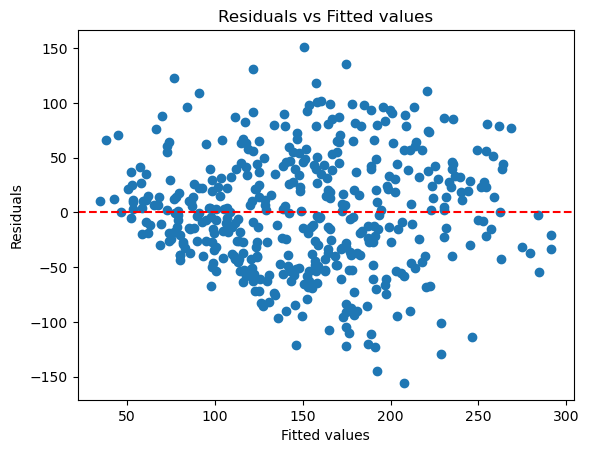

In [4]:
import matplotlib.pyplot as plt

# Plot residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


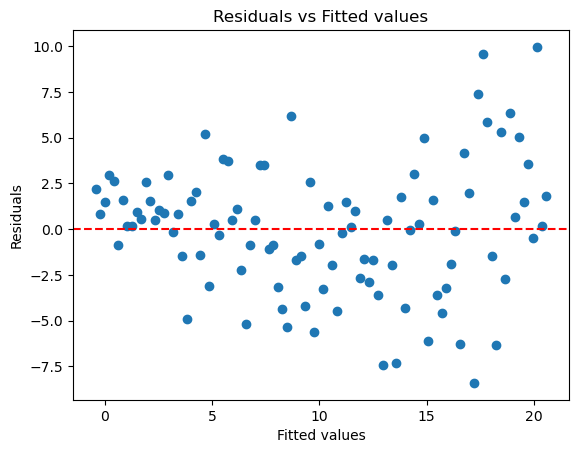

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate data with heteroskedasticity
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 1 + 0.5 * x, 100)

# Fit a simple linear regression model
coefficients = np.polyfit(x, y, 1)
y_fit = np.polyval(coefficients, x)
residuals = y - y_fit

# Plot residuals vs fitted values
plt.scatter(y_fit, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()


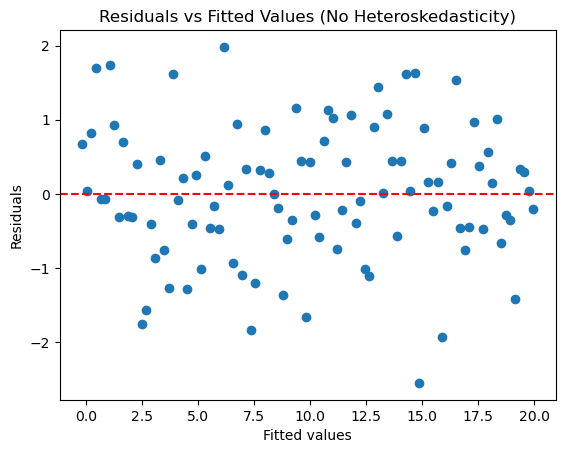

Breusch-Pagan test p-value: 0.6013945776291476
Breusch-Pagan Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.
Goldfeld-Quandt test F-statistic: 0.8981483826234788
Goldfeld-Quandt test p-value: 0.6443431676088434
Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt

# Simulate data with no heteroskedasticity
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 1, 100)  # constant variance of residuals

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit an OLS model
model = smf.ols('y ~ x', data=df).fit()

# Calculate residuals
residuals = model.resid

# Plot residuals vs fitted values
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (No Heteroskedasticity)')
plt.show()

# Perform the Breusch-Pagan test
bp_test_stat, bp_pval, _, _ = het_breuschpagan(residuals, model.model.exog)
print('Breusch-Pagan test p-value:', bp_pval)

# Interpretation for Breusch-Pagan Test
if bp_pval < 0.05:
    print("Breusch-Pagan Test: The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.")
else:
    print("Breusch-Pagan Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.")

# Perform the Goldfeld-Quandt test
gq_test_stat, gq_pval, _ = het_goldfeldquandt(residuals, model.model.exog, split=0.5)
print('Goldfeld-Quandt test F-statistic:', gq_test_stat)
print('Goldfeld-Quandt test p-value:', gq_pval)

# Interpretation for Goldfeld-Quandt Test
if gq_pval < 0.05:
    print("Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.")
else:
    print("Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.")


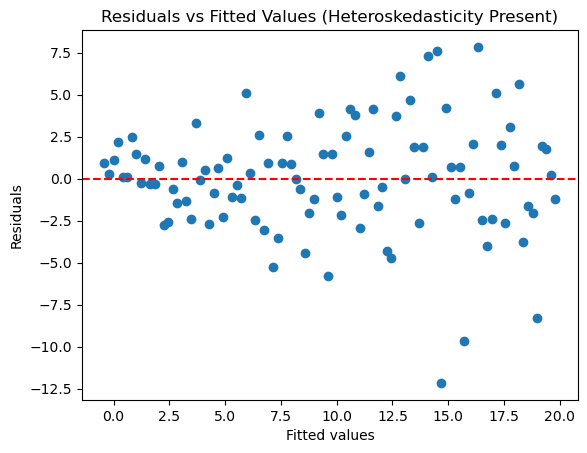

Breusch-Pagan test p-value: 0.002290269757130623
Breusch-Pagan Test: The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.
Goldfeld-Quandt test F-statistic: 3.6008864910899434
Goldfeld-Quandt test p-value: 9.456193799622816e-06
Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt

# Simulate data with heteroskedasticity
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 1 + 0.5 * x, 100)  # increasing variance of residuals

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit an OLS model
model = smf.ols('y ~ x', data=df).fit()

# Calculate residuals
residuals = model.resid

# Plot residuals vs fitted values
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Heteroskedasticity Present)')
plt.show()

# Perform the Breusch-Pagan test
bp_test_stat, bp_pval, _, _ = het_breuschpagan(residuals, model.model.exog)
print('Breusch-Pagan test p-value:', bp_pval)

# Interpretation for Breusch-Pagan Test
if bp_pval < 0.05:
    print("Breusch-Pagan Test: The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.")
else:
    print("Breusch-Pagan Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.")

# Perform the Goldfeld-Quandt test
gq_test_stat, gq_pval, _ = het_goldfeldquandt(residuals, model.model.exog, split=0.5)
print('Goldfeld-Quandt test F-statistic:', gq_test_stat)
print('Goldfeld-Quandt test p-value:', gq_pval)

# Interpretation for Goldfeld-Quandt Test
if gq_pval < 0.05:
    print("Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.")
else:
    print("Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.")
